In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
plotly.io.orca.config.executable = r'C:\Users\oveis.jalilian\AppData\Local\Programs\orca\orca.exe'

In [2]:
csvFiles = glob('*.csv')

In [3]:
dataframes = []
for file in csvFiles:
    df = pd.read_csv(file)
    dataframes.append(df)

In [4]:
report = pd.concat(dataframes,ignore_index=True)
report.head()
# This table is to report overall distribution of data

Canopy  PlotNumber    DGCI  pixel_DGCI Location   date    alt  \
0  1679.94       101.0  0.2097      352.28   Amenia  06-23  100Ft   
1  1642.14       102.0  0.2203      361.76   Amenia  06-23  100Ft   
2  1000.08       103.0  0.2261      226.12   Amenia  06-23  100Ft   
3   763.02       104.0  0.2091      159.55   Amenia  06-23  100Ft   
4   907.20       105.0  0.2155      195.50   Amenia  06-23  100Ft   

      Plot_Loc       YLD3  IDC1  ... DGCI_0708  pixel_DGCI_0708  Canopy_0714  \
0  Amenia, 101  38.955969   1.0  ...       NaN              NaN          NaN   
1  Amenia, 102  55.821002   1.0  ...       NaN              NaN          NaN   
2  Amenia, 103  40.826570   1.0  ...       NaN              NaN          NaN   
3  Amenia, 104  42.933747   1.0  ...       NaN              NaN          NaN   
4  Amenia, 105  38.205736   1.0  ...       NaN              NaN          NaN   

   DGCI_0714  pixel_DGCI_0714  Canopy_0724  DGCI_0724  pixel_DGCI_0724  \
0        NaN              NaN          NaN        NaN              NaN   
1        NaN              NaN          NaN        NaN              NaN   
2        NaN              NaN          NaN        NaN              NaN   
3        NaN              NaN          NaN        NaN              NaN   
4        NaN              NaN          NaN        NaN              NaN   

   AUC canopy x DGCI  AUC canopy x DGCI(adjusted_for_days_diff)  
0                NaN                                        NaN  
1                NaN                                        NaN  
2                NaN                                        NaN  
3                NaN                                        NaN  
4                NaN                                        NaN  

[5 rows x 45 columns]

In [5]:
# find out what date you want to use to report for each location. How you want to summarize the data for each location.

In [28]:
df = pd.read_excel('AUC_2016_metric.xlsx', sheet_name='AUC')
df17 = pd.read_excel('../2017_Flights/AUC_3_metric_canopyshapefile_adjusted.xlsx', sheet_name='AUC')

In [29]:
df.columns

Index(['PlotNumber', 'Location', 'date', 'alt', 'Plot_Loc', 'YLD3', 'IDC1',
       'Cultivar', 'Canopy', 'DGCI', 'CD', '0701.Canopy', '0701.DGCI',
       '0701_CD', '0722.Canopy', '0722.DGCI', '0722_CD', '0729.Canopy',
       '0729.DGCI', '0729_CD', 'AUC', 'AUC_CD', 'AUC_CD_adjusted_date_Diff',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')

In [30]:
# df.dropna(how='any', inplace=True)
df.shape

(480, 35)

In [70]:
DGCI_df= df.iloc[:,[5,0,1,7,9,12,15,18]]
DGCI = DGCI_df.dropna(how='any')
DGCI.reset_index(drop=True)
DGCI.columns = ['Yield','PlotNumber', 'Location', 'Cultivar','Jun-23','Jul-01','Jul-22','Jul-29']
DGCI.shape

(442, 8)

In [71]:
# loc = 'Amenia'
# Variety = DGCI[(DGCI.Location==loc)].Cultivar.unique()
# for i in range(len(Variety)):
    
#     index = DGCI[(DGCI.Location==loc) & (DGCI.Cultivar==Variety[i])].index
#     index = list(index)
#     DGCI.iloc[index,3:].transpose().plot()
#     plt.title(Variety[i])
#     plt.ylim(0.1,0.5)

In [72]:
Variety = DGCI.Cultivar.unique()
# # for i in range(len(Variety)):
    
# #     index = DGCI[(DGCI.Cultivar==Variety[i])].index
# #     index = list(index)
# #     DGCI.iloc[index,3:].transpose().plot()
# #     plt.title(Variety[i])
# #     plt.ylim(0.1,0.5)

In [86]:
DGCI.to_csv('DGCI.csv')
DGCI.head()

Yield  PlotNumber Location          Cultivar  Jun-23  Jul-01  Jul-22  \
0  2619.788923         101   Amenia   Thunder 3601R2Y  0.2097  0.2584  0.3097   
1  3753.962417         102   Amenia          NKS08-M2  0.2203  0.2470  0.3541   
2  2745.586808         103   Amenia         REA 64G94  0.2261  0.2558  0.3502   
3  2887.294514         104   Amenia        PFS 15R07N  0.2091  0.2439  0.3180   
4  2569.335716         105   Amenia  Thunder 3606R2Yn  0.2155  0.2480  0.3124   

   Jul-29  
0  0.3280  
1  0.3312  
2  0.3504  
3  0.3230  
4  0.3114

In [74]:
DGCI_melted = pd.melt(DGCI,id_vars=['PlotNumber','Location','Cultivar'],value_vars=['Jun-23','Jul-01','Jul-22','Jul-29'])

In [75]:
# for i in range(len(Variety)):

#     fig = px.line(DGCI_melted[DGCI_melted.Cultivar == Variety[i]], x='variable', y="value", line_group = 'PlotNumber',color='Location')

#     fig.update_layout(title_text=Variety[i],width=650, height=425,
#                       template="plotly_white",
#                       yaxis=dict(title='DGCI',tickmode = 'linear',range=[0,0.55],dtick=0.05,autorange=False),
#                       xaxis=dict(title='Date'),
#                       xaxis_showgrid=False, yaxis_showgrid=False,showlegend=True)
#     fig.write_image('H:\My Drive\Projects\Dissertation\Figures\Cultivar_2016\{}.png'.format(Variety[i]))
#     # fig.show()

In [89]:
ml = df[['DGCI','Canopy','0701.DGCI','0701.Canopy','0722.DGCI','0722.Canopy','0729.DGCI','0729.Canopy','YLD3']]
ml = ml.dropna(how='any').reset_index(drop=True)
ml.head()

DGCI    Canopy  0701.DGCI  0701.Canopy  0722.DGCI  0722.Canopy  \
0  0.2097  0.381617     0.2584     0.868436     0.3097     2.276833   
1  0.2203  0.373030     0.2470     0.925680     0.3541     2.094423   
2  0.2261  0.227179     0.2558     1.116496     0.3502     2.288873   
3  0.2091  0.173328     0.2439     0.944080     0.3180     1.951312   
4  0.2155  0.206080     0.2480     0.907053     0.3124     1.935637   

   0729.DGCI  0729.Canopy         YLD3  
0     0.3280     3.375837  2619.788923  
1     0.3312     3.397190  3753.962417  
2     0.3504     3.072805  2745.586808  
3     0.3230     3.103244  2887.294514  
4     0.3114     3.349032  2569.335716

In [90]:
X = ml.iloc[:,:-1]
y = ml.iloc[:,-1]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=13)

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=6, max_depth=4, random_state=13,bootstrap=True)
# rf=AdaBoostRegressor(n_estimators=10,random_state=13,learning_rate=0.91)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE=',round(rmse,2),'\nRsquare=', round(rf.score(X_test, y_test),2))

RMSE= 635.41 
Rsquare= 0.77


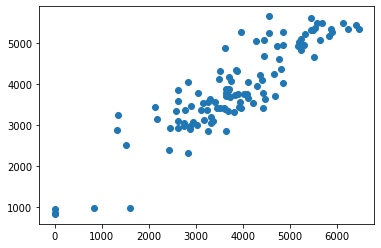

In [93]:
plt.scatter(y_test, y_pred)

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE=',round(rmse,2),'\nRsquare=', round(lr.score(X_test, y_test),2))

RMSE= 593.47 
Rsquare= 0.8


In [95]:
var16=set(df.Cultivar.unique())
var17=set(df17.Variety.unique())
common_varieties=list(var17.intersection(var16))

In [97]:
for i in range(len(common_varieties)):

    fig = px.line(DGCI_melted[DGCI_melted.Cultivar == common_varieties[i]], 
                  x='variable', y="value", line_group = 'PlotNumber',color='Location')

    fig.update_layout(title_text=common_varieties[i],width=650, height=425,
                      template="plotly_white",
                      yaxis=dict(title='DGCI',tickmode = 'linear',range=[0,0.55],dtick=0.05,autorange=False),
                      xaxis=dict(title='Date'),
                      xaxis_showgrid=False, yaxis_showgrid=False,showlegend=True)
    fig.write_image('H:\My Drive\Projects\Dissertation\Figures\Common\{}_2016.pdf'.format(common_varieties[i]))
#     # fig.show()

In [98]:
DGCI.head()

Yield  PlotNumber Location          Cultivar  Jun-23  Jul-01  Jul-22  \
0  2619.788923         101   Amenia   Thunder 3601R2Y  0.2097  0.2584  0.3097   
1  3753.962417         102   Amenia          NKS08-M2  0.2203  0.2470  0.3541   
2  2745.586808         103   Amenia         REA 64G94  0.2261  0.2558  0.3502   
3  2887.294514         104   Amenia        PFS 15R07N  0.2091  0.2439  0.3180   
4  2569.335716         105   Amenia  Thunder 3606R2Yn  0.2155  0.2480  0.3124   

   Jul-29  
0  0.3280  
1  0.3312  
2  0.3504  
3  0.3230  
4  0.3114

In [99]:
loc1='Hunter'
loc2='Amenia'
df17[df17.Location=='{}'.format(loc1)].describe().to_csv('{}_stat_2017.csv'.format(loc1),index=False)
df[df.Location=='{}'.format(loc2)].describe().to_csv('{}_stat_2016.csv'.format(loc2),index=False)

In [100]:
loc3='Leonard'
df17[['YLD3','Canopy_0724']][df17.Location=='{}'.format(loc3)].describe()
# df17.head()

YLD3  Canopy_0724
count   156.000000   156.000000
mean    625.885600     1.610842
std     454.525961     0.840175
min       0.000000     0.042289
25%     206.381258     1.066508
50%     605.062934     1.475388
75%     922.051537     2.271734
max    1802.111075     4.057014